In [1]:
from math import sqrt
from scipy import stats

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

---
# Variance & Standard Deviation

In [2]:
example_one = np.array([-10, 0, 10, 20, 30])
example_one

array([-10,   0,  10,  20,  30])

In [3]:
example_one.mean()

10.0

In [4]:
example_two = np.array([8, 9, 10, 11, 12])
example_two

array([ 8,  9, 10, 11, 12])

In [5]:
example_two.mean()

10.0

In [6]:
# numpy variance
example_one.var()

200.0

In [7]:
# numpy variance
example_two.var()

2.0

In [8]:
# manually calculating variance for example_one
((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one)

200.0

In [9]:
# manually calculating variance for example_two
((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two)


2.0

In [10]:
# manually calculating standard deviation for example_one
sqrt(((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one))

14.142135623730951

In [11]:
# manually calculating standard deviation for example_two
sqrt(((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two))

1.4142135623730951

---
# Simulation Exercises

#### 1. How likely is it that you roll doubles when rolling two dice?

In [12]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 2 # dice

dice_rolls = pd.DataFrame(np.random.choice(range(1,7), size=(n_simulations, n_trials)))
dice_rolls

,0,1
0,6,6
1,4,1
2,2,2
3,5,5
4,4,4
...,...,...
9995,6,1
9996,5,4
9997,4,6
9998,1,3


In [13]:
# aggregate by row
dice_rolls["doubles"] = dice_rolls[0] == dice_rolls[1]
dice_rolls

,0,1,doubles
0,6,6,True
1,4,1,False
2,2,2,True
3,5,5,True
4,4,4,True
...,...,...,...
9995,6,1,False
9996,5,4,False
9997,4,6,False
9998,1,3,False


In [14]:
# aggregate for probability
(dice_rolls["doubles"] == True).mean()

0.1713

#### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads?

In [15]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 8 # coins

# 0 represents tails; 1 represents heads
coin_flips = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials)))
coin_flips

,0,1,2,3,4,5,6,7
0,1,1,0,1,1,0,1,1
1,0,0,0,1,1,0,1,0
2,1,1,0,1,0,0,0,0
3,0,0,1,0,0,1,1,1
4,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,1,0,1
9996,0,1,1,1,1,1,0,1
9997,1,1,1,0,1,0,1,0
9998,1,1,1,1,1,0,0,1


In [16]:
# aggregate by row
coin_flips["total_heads"] = coin_flips.sum(axis=1)
coin_flips

,0,1,2,3,4,5,6,7,total_heads
0,1,1,0,1,1,0,1,1,6
1,0,0,0,1,1,0,1,0,3
2,1,1,0,1,0,0,0,0,3
3,0,0,1,0,0,1,1,1,4
4,0,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,1,0,1,4
9996,0,1,1,1,1,1,0,1,6
9997,1,1,1,0,1,0,1,0,5
9998,1,1,1,1,1,0,0,1,6


In [17]:
# aggregate for probability
(coin_flips["total_heads"] == 3).mean()

0.218

#### If you flip 8 coins, what is the probability of getting more than 3 heads?

In [18]:
# aggregate for probability
(coin_flips["total_heads"] > 3).mean()

0.6342

#### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [19]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 2 # billboards

# 0 represents web dev students; 1 represents data sci students
billboards = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[3/4, 1/4]))
billboards

,0,1
0,0,0
1,0,1
2,0,0
3,1,1
4,1,0
...,...,...
9995,0,1
9996,0,0
9997,0,0
9998,0,0


In [20]:
# aggregate by row
billboards["total_data_sci"] = billboards.sum(axis=1)
billboards

,0,1,total_data_sci
0,0,0,0
1,0,1,1
2,0,0,0
3,1,1,2
4,1,0,1
...,...,...,...
9995,0,1,1
9996,0,0,0
9997,0,0,0
9998,0,0,0


In [21]:
# aggregate for probability
(billboards["total_data_sci"] == 2).mean()

0.0602

#### 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [22]:
# represent data
# create matrix
mean = 3
std = 1.5
n_simulations = 10_000
n_trials = 5 # weekdays

poptarts = np.round(np.random.normal(mean, std, size=(n_simulations, n_trials)))
poptarts

array([[ 4.,  4.,  3.,  2.,  2.],
       [ 3.,  4.,  3.,  2.,  3.],
       [ 4., -0.,  1.,  0.,  5.],
       ...,
       [ 2.,  1.,  3.,  2.,  2.],
       [ 2.,  3.,  4.,  3.,  2.],
       [ 4.,  2.,  1.,  4.,  1.]])

In [23]:
poptarts = pd.DataFrame(poptarts)
poptarts

,0,1,2,3,4
0,4.0,4.0,3.0,2.0,2.0
1,3.0,4.0,3.0,2.0,3.0
2,4.0,-0.0,1.0,0.0,5.0
3,4.0,2.0,1.0,3.0,2.0
4,3.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...
9995,3.0,1.0,1.0,2.0,2.0
9996,2.0,3.0,3.0,5.0,3.0
9997,2.0,1.0,3.0,2.0,2.0
9998,2.0,3.0,4.0,3.0,2.0


In [24]:
poptarts = pd.DataFrame(np.where(poptarts < 0, 0, poptarts))
poptarts

,0,1,2,3,4
0,4.0,4.0,3.0,2.0,2.0
1,3.0,4.0,3.0,2.0,3.0
2,4.0,-0.0,1.0,0.0,5.0
3,4.0,2.0,1.0,3.0,2.0
4,3.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...
9995,3.0,1.0,1.0,2.0,2.0
9996,2.0,3.0,3.0,5.0,3.0
9997,2.0,1.0,3.0,2.0,2.0
9998,2.0,3.0,4.0,3.0,2.0


In [25]:
# aggregate by row
poptarts["weekly_consumption"] = poptarts.sum(axis=1)
poptarts

,0,1,2,3,4,weekly_consumption
0,4.0,4.0,3.0,2.0,2.0,15.0
1,3.0,4.0,3.0,2.0,3.0,15.0
2,4.0,-0.0,1.0,0.0,5.0,10.0
3,4.0,2.0,1.0,3.0,2.0,12.0
4,3.0,3.0,1.0,2.0,1.0,10.0
...,...,...,...,...,...,...
9995,3.0,1.0,1.0,2.0,2.0,9.0
9996,2.0,3.0,3.0,5.0,3.0,16.0
9997,2.0,1.0,3.0,2.0,2.0,10.0
9998,2.0,3.0,4.0,3.0,2.0,14.0


In [26]:
# aggregate for probabilty
(poptarts["weekly_consumption"] < 17).mean()

0.6788

#### Exercise 5
5. Compare Heights:
    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

In [27]:
# represent data
m_mean = 178
m_std = 8

f_mean = 170
f_std = 6

# create matrices
n_simulations = 10_000

men = pd.DataFrame(np.random.normal(m_mean, m_std, size=(n_simulations)))
women = pd.DataFrame(np.random.normal(f_mean, f_std, size=(n_simulations)))

# aggregate by row
women > men

# aggregate for probability
(women > men).mean()

0    0.2137
dtype: float64

#### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue?

In [28]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 50 # students

# 0 is fail; 1 is pass
conda_dls = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[1/250, 249/250]))
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9996,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
# aggregate by row
conda_dls["total_dls"] = conda_dls.sum(axis=1)
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,total_dls
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9996,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,48
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50


In [30]:
# aggregate for probability
(conda_dls["total_dls"] == 50).mean()

0.8212

#### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [31]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 3 # three days

# 0 is no food trucks; 1 is food trucks
food_trucks = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[.3, .7]))
food_trucks

,0,1,2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,0,1
4,1,1,1
...,...,...,...
9995,0,1,1
9996,1,0,1
9997,0,1,1
9998,1,1,1


In [32]:
# aggregate by row
food_trucks["total_trucks_over_three_days"] = food_trucks.sum(axis=1)
food_trucks

,0,1,2,total_trucks_over_three_days
0,1,1,1,3
1,1,1,1,3
2,1,1,1,3
3,1,0,1,2
4,1,1,1,3
...,...,...,...,...
9995,0,1,1,2
9996,1,0,1,2
9997,0,1,1,2
9998,1,1,1,3


In [33]:
# aggregate for probability
(food_trucks["total_trucks_over_three_days"] == 0).mean()

0.0249

#### 8. If 23 people are in the same room, what are the odds that two of them share a birthday?

In [34]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 23 # people

birthdays = pd.DataFrame(np.random.choice(range(0, 365), size=(n_simulations, n_trials)))
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,93,77,154,9,239,186,208,240,162,229,...,124,107,257,301,233,115,204,129,175,7
1,243,255,206,241,140,139,22,288,302,278,...,297,102,356,166,92,230,132,353,333,202
2,339,269,297,364,216,63,96,164,75,315,...,242,74,106,38,131,241,173,318,254,99
3,164,303,145,221,105,108,267,271,175,257,...,201,358,243,210,8,92,358,131,362,91
4,84,58,36,245,296,299,25,351,174,156,...,113,196,311,147,129,220,221,259,94,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,308,57,18,145,69,64,36,164,180,215,...,297,286,123,207,103,116,281,22,180,319
9996,62,363,55,25,15,337,142,218,180,210,...,78,5,146,101,230,131,173,149,210,121
9997,197,337,142,163,321,103,97,161,245,56,...,307,262,298,259,304,346,15,112,0,259
9998,267,263,63,287,244,251,108,229,182,220,...,55,229,95,9,341,238,88,142,124,92


In [35]:
# aggregate by row
birthdays["unique_birthdays"] = birthdays.nunique(axis=1)
birthdays

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,unique_birthdays
0,93,77,154,9,239,186,208,240,162,229,...,107,257,301,233,115,204,129,175,7,22
1,243,255,206,241,140,139,22,288,302,278,...,102,356,166,92,230,132,353,333,202,23
2,339,269,297,364,216,63,96,164,75,315,...,74,106,38,131,241,173,318,254,99,23
3,164,303,145,221,105,108,267,271,175,257,...,358,243,210,8,92,358,131,362,91,22
4,84,58,36,245,296,299,25,351,174,156,...,196,311,147,129,220,221,259,94,9,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,308,57,18,145,69,64,36,164,180,215,...,286,123,207,103,116,281,22,180,319,22
9996,62,363,55,25,15,337,142,218,180,210,...,5,146,101,230,131,173,149,210,121,22
9997,197,337,142,163,321,103,97,161,245,56,...,262,298,259,304,346,15,112,0,259,21
9998,267,263,63,287,244,251,108,229,182,220,...,229,95,9,341,238,88,142,124,92,22


In [36]:
# aggregate for probability
(birthdays["unique_birthdays"] < 23).mean()

0.5083

---
# Probability Distributions

### Uniform Distribution

In [37]:
die_distribution = stats.randint(1, 7)

In [38]:
die_distribution

#### scipy functions for distributions

In [39]:
# .rvs() no argument = single randint
die_distribution.rvs()

5

In [40]:
# .rvs singular int = quantity of int randints
die_distribution.rvs(5)

array([4, 3, 3, 3, 4])

In [41]:
# .rvs tuple = martix of randints
die_distribution.rvs((5,6)) # five rows, six columns

array([[5, 3, 6, 4, 2, 5],
       [3, 5, 5, 2, 3, 1],
       [6, 1, 1, 5, 4, 6],
       [2, 2, 3, 2, 4, 6],
       [5, 1, 1, 3, 1, 1]])

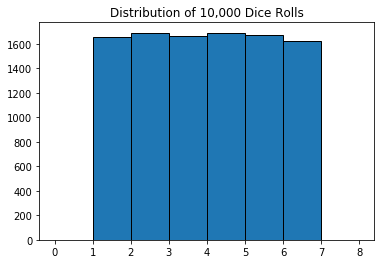

In [42]:
# using random values to visualize a distribution
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0,9), edgecolor="black")
plt.title("Distribution of 10,000 Dice Rolls")
plt.show()

In [43]:
# .pmf - probability mass function - for discrete variables
# singular probability mass (percent chance) of discrete outcome
die_distribution.pmf(4)

0.16666666666666666

In [44]:
die_distribution.pmf([1, 3, 6])

array([0.16666667, 0.16666667, 0.16666667])

In [45]:
# .pdf - probability density function - for continuious variables


In [46]:
# .cdf - cumulative density function
# likelihood of certain outcome or all the results below it (i.e., <= )
die_distribution.cdf(4)

0.6666666666666666

In [47]:
# .ppf - percent point function - aka quantile function
# inverse of .cdf
# accepts a probability and returns the value associated with that probability
die_distribution.ppf(5/6)

5.0

In [48]:
# .sf - survival function - probability of a random variable taking on a value greater than a given point (i.e., > )
# what is the likelihood we roll greater than a 5 (i.e., 6 )
die_distribution.sf(5)

0.16666666666666663

In [49]:
# .isf - inverse survival function - returns a value given a probability
print(die_distribution.isf(.5))
print(die_distribution.isf(4/6))

3.0
2.0


### Binomial Distribution

>You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [50]:
n = 30 # questions; trials
p = .25 # four choices for each question

stats.binom(n, p).pmf(10)

0.09086524035782864

In [51]:
stats.binom(n, p).sf(10)

0.10572812269266013

> A binomial distribution with an n of 1 is referred to as a Bernoulli Distribution.

### Normal Distribution

Allows us to model a continuous random variable where the further away from the mean the less likely the outcome. Commonly referred to as a "bell curve"

Defined by mean and standard deviation. The **standard normal distribution** is a normal distribution with a mean of 0 and a standard deviation of 1

> Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [52]:
mean = 12_000
std = 2_000

stats.norm(mean, std).isf(.10)

14563.103131089201

In [53]:
stats.norm(mean, std).ppf(.9) # 90th percentile

14563.103131089201

> How likely is it that the store sells less than 10,000 dollars one day?

In [54]:
stats.norm(mean, std).cdf(10_000)

0.15865525393145707

### Poisson Distribution

> Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?

In [56]:
stats.poisson(5).pmf(3)

0.1403738958142805

In [58]:
stats.poisson(5).sf(7)

0.13337167407000744